# 생선 분류

- 수산물 전문 물류 센터에서 신입 직원들이 생선 이름을 외우지 못해 작업의 효율성이 현저히 떨어지는 일이 잦음
- 이 물류 센터에서는 주로 생선의 길이와 무게로 생선을 분류
- 판매하는 생선은 도미, 잉어, 대구, 청돔, 농어, 민물꼬치고기, 빙어 임 

# 이진 분류 (binary classification)

- 분류(classification) : 여러 개의 범주(클래스) 중 하나를 구별해 내는 것
- 이진 분류 : 2개의 범주 중 하나를 고르는 분류
  - 도미인가 빙어인가

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

## 데이터 준비

In [8]:
df = pd.read_csv("./data/Fish.csv")

In [10]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [14]:
df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [16]:
# 이번 예제에서는 도미와 빙어에 대한 데이터 중 종, 무게 길이 피처만 사용
df = df.loc[df["Species"].isin(["Bream", "Smelt"]), ["Species", "Weight", "Length2"]]

In [18]:
df.head()

,Species,Weight,Length2
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [20]:
df.shape

(49, 3)

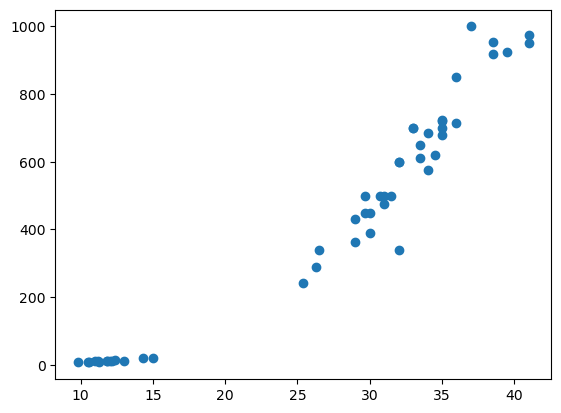

In [22]:
plt.figure()
plt.scatter(data = df, x = "Length2", y = "Weight")
plt.show()

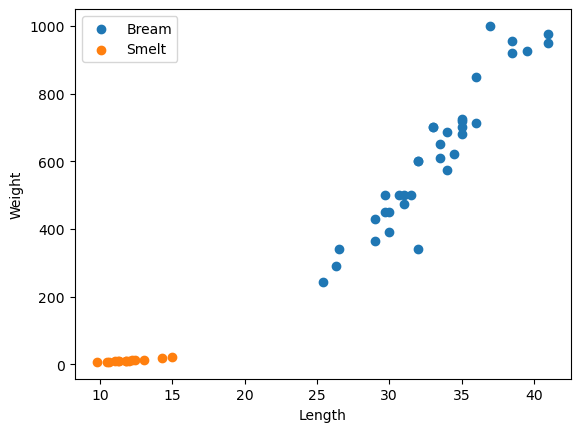

In [24]:
groups = df.groupby("Species")

plt.figure()

for name, group in groups:
    plt.scatter(group["Length2"],
                group["Weight"],
                label = name)

plt.legend()
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

- 도미의 길이가 길수록 모게가 무거워지는 경향이 있음
- 빙어는 상대적으로 무게가 영향을 덜 받는 것처럼 보이지만 데이터의 분포가 일직선에 가까워 선형적

### 레이블 인코딩

- 컴퓨터는 문자의 의미를 직접 이해하지 못함
- 따라서 도미와 빙어를 숫자 0과 1로 표현

In [28]:
# 레이블인코더 객체 생성 
le = LabelEncoder()

In [30]:
# 레이블인코더 학습 후 변환
df["label"] = le.fit_transform(df["Species"])

In [32]:
df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [34]:
df["Species"].value_counts()

Species
Bream    35
Smelt    14
Name: count, dtype: int64

In [36]:
df["label"].value_counts()

label
0    35
1    14
Name: count, dtype: int64

## 모델 훈련

#### K-Nearest Neighbor

<img src="./image/KNN.png" />

- 기존 데이터 중 가장 유사한 K개의 데이터를 이용해서 새로운 데이터를 예측
- 특징
  - 최고 인접 다수결
    - 기존 데이터 중 가장 유사한 k개의 데이터를 측정하여 분류
  - Lazy learning 기법
    - 새로운 입력 값이 들어온 후 분류 시작
    - 데이터셋을 저장만 하고 일반화된 모델을 능동적으로 만들지 않음
  - 단순 유연성
    - 모형이 단순하며 파라미터의 가정이 거의 없음
- 장점
  - 학습이 간단
  - 훈련데이터의 크기가 클수록 정확해짐
  - 모형이 단순하고 쉽게 구현할 수 있음
- 단점
  - k값 선정에 따라 성능이 좌우됨
  - 높은 자원요구량
    - 데이터셋 전체를 메모리에 기억
  - 계산 복잡성
    - 모든 데이터와의 거리측정 수행이 필요

In [41]:
# KNN 모델 객체 생성
knn = KNeighborsClassifier()

In [43]:
# 모델 훈련
knn.fit(df[["Length2", "Weight"]], df["label"])

KNeighborsClassifier()

## 모델 평가

In [46]:
# 정확도
knn.score(df[["Length2", "Weight"]], df["label"])

1.0